# List of Epidemics / Pandemics / Outbreak considered

> * **COVID-19** - *COrona VIrus Disease - 2019*  
> * **MERS** - *Middle Easter Respirator Syndrome / Camel Flu*  
> * **SARS** - *Severe Acute Respiratory Syndrome of 2002*  
> * **Ebola** - *Western africa ebola virus outbreak (2013-2016) of Ebola Virus Disease (EVD)*  
> * **H1N1** - *H1N1 pandemic of 2009 / Swine Flu*  
> * **Nipha** - *Nipha virus infection from 1st instance in Malaysia*  
> * **Zika** - *Zika virus epidemic of 2015-2016*  

# Libraries

In [1]:
# utility libraries
from datetime import timedelta
import math

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px

In [2]:
# dealing with geographic data
import geopandas as gpd
from geopandas.tools import geocode

# implicitly registered datetime converter for a matplotlib plotting method
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# offline plotly
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [4]:
# theme
sns.set_style('whitegrid')

# Data and Preprocessing

### COVID-19 Dataset

In [5]:
# COVID-19
# --------

# covid_19 dataset
covid_19 = pd.read_csv('../input/corona-virus-report/covid_19_clean_complete.csv', 
                       parse_dates=['Date'])

covid_19.loc[covid_19['Province/State']=='Greenland', 'Country/Region'] = 'Greenland'

# selecting important columns only
covid_19 = covid_19[['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']]

# replacing Mainland china with just China
covid_19['Country/Region'] = covid_19['Country/Region'].replace('Mainland China', 'China')

# renaming columns
covid_19.columns = ['Date', 'Country', 'Cases', 'Deaths', 'Recovered']

# group by date and country
covid_19 = covid_19.groupby(['Date', 'Country'])['Cases', 'Deaths', 'Recovered']
covid_19 = covid_19.sum().reset_index()

# covid_19.head()

In [6]:
# latest
c_lat = covid_19[covid_19['Date'] == max(covid_19['Date'])].reset_index()

# latest grouped by country
c_lat_grp = c_lat.groupby('Country')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
covid_19['nth_day'] = (covid_19['Date'] - min(covid_19['Date'])).dt.days

In [7]:
# day by day
c_dbd = covid_19.groupby('Date')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
c_dbd['nth_day'] = covid_19.groupby('Date')['nth_day'].max().values

# no. of countries
temp = covid_19[covid_19['Cases']>0]
c_dbd['n_countries'] = temp.groupby('Date')['Country'].apply(len).values

c_dbd['new_cases'] = c_dbd['Cases'].diff()
c_dbd['new_deaths'] = c_dbd['Deaths'].diff()
c_dbd['epidemic'] = 'COVID-19'

### EBOLA Dataset

In [8]:
# EBOLA
# ------

# ebola dataset
ebola_14 = pd.read_csv("../input/ebola-outbreak-20142016-complete-dataset/ebola_2014_2016_clean.csv", 
                       parse_dates=['Date'])

# ebola_14 = ebola_14[ebola_14['Date']!=max(ebola_14['Date'])]

# selecting important columns only
ebola_14 = ebola_14[['Date', 'Country', 
                     'Cumulative no. of confirmed, probable and suspected cases',
                     'Cumulative no. of confirmed, probable and suspected deaths']]

# renaming columns
ebola_14.columns = ['Date', 'Country', 'Cases', 'Deaths']
ebola_14.head()

# group by date and country
ebola_14 = ebola_14.groupby(['Date', 'Country'])['Cases', 'Deaths']
ebola_14 = ebola_14.sum().reset_index()

# filling missing values
ebola_14['Cases'] = ebola_14['Cases'].fillna(0)
ebola_14['Deaths'] = ebola_14['Deaths'].fillna(0)

# converting datatypes
ebola_14['Cases'] = ebola_14['Cases'].astype('int')
ebola_14['Deaths'] = ebola_14['Deaths'].astype('int')

# ebola_14.head()

In [9]:
# latest
e_lat = ebola_14[ebola_14['Date'] == max(ebola_14['Date'])].reset_index()

# latest grouped by country
e_lat_grp = e_lat.groupby('Country')['Cases', 'Deaths'].sum().reset_index()

# nth day
ebola_14['nth_day'] = (ebola_14['Date'] - min(ebola_14['Date'])).dt.days

In [10]:
# day by day
e_dbd = ebola_14.groupby('Date')['Cases', 'Deaths'].sum().reset_index()

# nth day
e_dbd['nth_day'] = ebola_14.groupby('Date')['nth_day'].max().values

# no. of countries
temp = ebola_14[ebola_14['Cases']>0]
e_dbd['n_countries'] = temp.groupby('Date')['Country'].apply(len).values

e_dbd['new_cases'] = e_dbd['Cases'].diff()
e_dbd['new_deaths'] = e_dbd['Deaths'].diff()
e_dbd['epidemic'] = 'EBOLA'

### SARS Dataset

In [11]:
# SARS
# ----

# sars dataset
sars_03 = pd.read_csv("../input/sars-outbreak-2003-complete-dataset/sars_2003_complete_dataset_clean.csv", 
                       parse_dates=['Date'])

# selecting important columns only
sars_03 = sars_03[['Date', 'Country', 'Cumulative number of case(s)', 
                   'Number of deaths', 'Number recovered']]

# renaming columns
sars_03.columns = ['Date', 'Country', 'Cases', 'Deaths', 'Recovered']

# group by date and country
sars_03 = sars_03.groupby(['Date', 'Country'])['Cases', 'Deaths', 'Recovered']
sars_03 = sars_03.sum().reset_index()

# s_dbd.head()

In [12]:
# latest
s_lat = sars_03[sars_03['Date'] == max(sars_03['Date'])].reset_index()

# latest grouped by country
s_lat_grp = s_lat.groupby('Country')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
sars_03['nth_day'] = (sars_03['Date'] - min(sars_03['Date'])).dt.days

In [13]:
# day by day
s_dbd = sars_03.groupby('Date')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
s_dbd['nth_day'] = sars_03.groupby('Date')['nth_day'].max().values

# no. of countries
temp = sars_03[sars_03['Cases']>0]
s_dbd['n_countries'] = temp.groupby('Date')['Country'].apply(len).values


s_dbd['new_cases'] = s_dbd['Cases'].diff()
s_dbd['new_deaths'] = s_dbd['Deaths'].diff()
s_dbd['epidemic'] = 'SARS'

### MERS Dataset

In [14]:
# Country wise data
# =================

# read data
mers_cntry = pd.read_csv("../input/mers-outbreak-dataset-20122019/country_count_latest.csv")

In [15]:
# Weekly data
# ===========

# read data
mers_weekly = pd.read_csv("../input/mers-outbreak-dataset-20122019/weekly_clean.csv")

# create 'Year-Week' columns
mers_weekly['Year-Week'] = mers_weekly['Year'].astype(str) + ' - ' + mers_weekly['Week'].astype(str)

# date from year and week column
mers_weekly['Date'] = pd.to_datetime(mers_weekly['Week'].astype(str) + 
                                     mers_weekly['Year'].astype(str).add('-1'),format='%V%G-%u')

# last few rows
mers_weekly.head()

Year  Week             Region  New Cases  Year-Week       Date
0  2012    12    Other Countries          1  2012 - 12 2012-03-19
1  2012    12  Republic of Korea          0  2012 - 12 2012-03-19
2  2012    12       Saudi Arabia          0  2012 - 12 2012-03-19
3  2012    13    Other Countries          0  2012 - 13 2012-03-26
4  2012    13  Republic of Korea          0  2012 - 13 2012-03-26

### H1N1

In [16]:
# complete dataset
h1n1 = pd.read_csv('../input/h1n1-swine-flu-2009-pandemic-dataset/data.csv')

# fix datetime
h1n1['Date'] = pd.to_datetime(h1n1['Date'])

# first few rows
h1n1.head()

Date                   Country  Cumulative no. of cases  \
0 2009-04-24                    Mexico                       18   
1 2009-04-24  United States of America                        7   
2 2009-04-26                    Mexico                       18   
3 2009-04-26  United States of America                       20   
4 2009-04-27                    Canada                        6   

   Cumulative no. of deaths                                        Link  
0                         0  https://www.who.int/csr/don/2009_04_24/en/  
1                         0  https://www.who.int/csr/don/2009_04_24/en/  
2                         0  https://www.who.int/csr/don/2009_04_24/en/  
3                         0  https://www.who.int/csr/don/2009_04_24/en/  
4                         0  https://www.who.int/csr/don/2009_04_24/en/

In [17]:
# day wise
h_dbd = h1n1 \
                .groupby('Date')['Cumulative no. of cases', 'Cumulative no. of deaths'] \
                .sum() \
                .reset_index()

# no. of countries column
h_dbd['No. of countries'] = h1n1.groupby('Date').apply(len).values

# column name
h_dbd.columns = ['Date', 'Cases', 'Deaths', 'n_countries']

# epidemic name
h_dbd['epidemic'] = 'H1N1'

# nth day
h_dbd['nth_day'] = (h_dbd['Date'] - min(h_dbd['Date'])).dt.days

# first few rows
h_dbd.head()              

Date  Cases  Deaths  n_countries epidemic  nth_day
0 2009-04-24     25       0            2     H1N1        0
1 2009-04-26     38       0            2     H1N1        2
2 2009-04-27     73       7            4     H1N1        3
3 2009-04-28    105       7            7     H1N1        4
4 2009-04-29    149       8            9     H1N1        5

### Combined

In [18]:
combined = pd.concat([s_dbd, h_dbd, e_dbd, c_dbd], axis=0, sort=True)
combined.head()

Cases       Date  Deaths  Recovered epidemic  n_countries  new_cases  \
0    167 2003-03-17       4        0.0     SARS            7        NaN   
1    219 2003-03-18       4        0.0     SARS            9       52.0   
2    264 2003-03-19       9        0.0     SARS           11       45.0   
3    306 2003-03-20      10        0.0     SARS           12       42.0   
4    350 2003-03-21      10        0.0     SARS           14       44.0   

   new_deaths  nth_day  
0         NaN        0  
1         0.0        1  
2         5.0        2  
3         1.0        3  
4         0.0        4

### Geo Data

In [19]:
world_map = gpd.read_file('../input/human-development-index-hdi/countries.geojson')
world_map = world_map[world_map['name']!='Antarctica']
world_map = world_map[['name', 'continent', 'geometry']]

world_map.head()

name      continent  \
0        Aruba  North America   
1  Afghanistan           Asia   
2       Angola         Africa   
3     Anguilla  North America   
4      Albania         Europe   

                                            geometry  
0  POLYGON ((-69.89912 12.45200, -69.89570 12.423...  
1  POLYGON ((74.89131 37.23164, 74.84023 37.22505...  
2  MULTIPOLYGON (((14.19082 -5.87598, 14.39863 -5...  
3  POLYGON ((-63.00122 18.22178, -63.16001 18.171...  
4  POLYGON ((20.06396 42.54727, 20.10352 42.52466...

### Combined data

In [20]:
# name of the epidemic
epidemic = ['COVID-19', 'MERS', 'SARS', 'EBOLA', 'H1N1', 'NIPHA', 'ZIKA']
# no. of confirmed cases
confirmed = [c_lat['Cases'].sum(), '2521', '8098', '28646', '491382', '', '']
# no. of deaths reported
deaths = [c_lat['Deaths'].sum(), '866', '774', '11323', '18449', '', '']
# no. of recovered cases
recovered = [c_lat['Recovered'].sum(), '', '', '', '', '', '']
# no. of HCW(health care workers) got affected
health_care_workers = ['', '', '21', '', '', '', '']

In [21]:
# no. of countries or regions to which epidemic spread
no_of_countries_or_region = ['216', '28', '29', '10', '214', '4', '91']
# first reported place
first_reported_place = ['Wuhan, China', 'Jeddah, Saudi Arabia', 'Foshan City, Guangdong, China', 'Meliandou, Guinea', 'Veracruz, Mexico', 'Malaysia', 'Uganda']
# first reported country
first_reported_country = ['China', 'Saudi Arabia', 'China', 'Guinea', 'North America', 'Malaysia', 'Uganda']

In [22]:
# first reported year
first_reported_year = ['2019', '2012', '2002', '2014', '2009', '1999', '']
# first reported data
first_reported_date = ['8 December, 2019', 'June 13, 2012', 'November 16, 2002', 'March 23, 2014', 'April 18, 2009', '', '']
# epidemic span
span = ['2019-2020', '2012-Present', '2002-2004', '2014-2016', '2009-2010', '', '']

# day on which no. of cases reached 100 
date_100th_case = ['', 'July 22, 2013', '', '31 March, 2014', '28, April 2009', '', '']
# day on which no. of cases reached 1000
date_1000th_case = ['25 January, 2020', '3 December, 2014', '26 March, 2003', '23 July, 2014', '4 May, 2009 ', '', '']
# day on which no. of cases reached 10000
date_10000th_case = ['1 February 2020', '', '', '19 October, 2014', '20th May, 2009', '', '']
# day on which no. of cases reached 100000
date_100000th_case = ['6 March, 2020', '', '', '', '', '', '']

In [23]:
# estimated no. of people infected by a individual with diseases
ro = ['2-2.5', '0.3-0.8', '2-4', '1.6-2', '1.2-1.6', '0.48-0.49', '3-6.6']

# cases fatality rate
cfr = ['1.38-3.4', '34.4-43', '9.6-11', '49-53', '0.05-0.1', '40-70', '7.2-9.6']

# estimated time from exposure to first symptoms
incubation_period = ['4-14', '2-14', '2-7', '2-21', '2-6', '4-14', '3-14']

# estimated percentage for total cases
hospitalization_rate = ['19', 'Most cases', 'Most cases', '', '2', '', '']

In [24]:
# create a dataframe
# ==================

# create a dataframe
df = pd.DataFrame({'Epidemic' : epidemic, 
                   'Confirmed': confirmed, 
                   'Deaths': deaths, 
                   'Recovered': recovered, 
                   'HCW': health_care_workers, 
                   
                   'No. of Countries': no_of_countries_or_region, 
                   'First Reported Place': first_reported_place, 
                   'First Reported Country': first_reported_country, 
                   
                   'First Reported Year': first_reported_year, 
                   'First Reported Date': first_reported_date, 
                   '100th Case On': date_100th_case, 
                   '1000th Case On': date_1000th_case, 
                   '10000th Case On': date_10000th_case, 
                   '100000th Case On': date_100000th_case, 
                   
                   'Ro': ro, 
                   'CFR': cfr, 
                   'Incubation Period': incubation_period, 
                   'Hospitalization Rate': hospitalization_rate})
    
# dataframe
# df

In [25]:
# preprocessing
# =============

# fix numerical values
# ====================
for col in ['Confirmed', 'Deaths', 'Recovered', 'HCW', 'No. of Countries', 
            'First Reported Year']:
    df[col] = df[col].replace('', 0)
    df[col] = df[col].astype('int')
    
    
# fix datetime values
# ===================
for col in ['First Reported Date', '100th Case On', '1000th Case On',
            '10000th Case On', '100000th Case On']:
    # df[col] = df[col].replace('', 0)
    df[col] = pd.to_datetime(df[col])
    
    
# get latitude and longitude of the origin place
# ==============================================

# container for latitude and longitude values
# lon = []
# lat = []

# use geocode library to get latitude and longitude
# for place in df['First Reported Place']:
#     result = geocode(place, timeout=10)
#     point = result.geometry.iloc[0]
#     lon.append(point.x)
#     lat.append(point.y)
    
# manually add latitude and longitude values
lat = [30.5928, 21.4858, 23.0215, 8.6161, 19.1738, 4.2105, 1.3733]
lon = [114.3055, 39.1925, 113.1214, 10.0612, -96.1342, 101.9758, 32.2903]

# add to dataframe
df['Latitude'] = lat
df['Longitude'] = lon
    
# dataframe
df

Epidemic  Confirmed  Deaths  Recovered  HCW  No. of Countries  \
0  COVID-19   11266568  530738    5987997    0               216   
1      MERS       2521     866          0    0                28   
2      SARS       8098     774          0   21                29   
3     EBOLA      28646   11323          0    0                10   
4      H1N1     491382   18449          0    0               214   
5     NIPHA          0       0          0    0                 4   
6      ZIKA          0       0          0    0                91   

            First Reported Place First Reported Country  First Reported Year  \
0                   Wuhan, China                  China                 2019   
1           Jeddah, Saudi Arabia           Saudi Arabia                 2012   
2  Foshan City, Guangdong, China                  China                 2002   
3              Meliandou, Guinea                 Guinea                 2014   
4               Veracruz, Mexico          North America                 2009   
5                       Malaysia               Malaysia                 1999   
6                         Uganda                 Uganda                    0   

  First Reported Date 100th Case On 1000th Case On 10000th Case On  \
0          2019-12-08           NaT     2020-01-25      2020-02-01   
1          2012-06-13    2013-07-22     2014-12-03             NaT   
2          2002-11-16           NaT     2003-03-26             NaT   
3          2014-03-23    2014-03-31     2014-07-23      2014-10-19   
4          2009-04-18    2009-04-28     2009-05-04      2009-05-20   
5                 NaT           NaT            NaT             NaT   
6                 NaT           NaT            NaT             NaT   

  100000th Case On         Ro       CFR Incubation Period  \
0       2020-03-06      2-2.5  1.38-3.4              4-14   
1              NaT    0.3-0.8   34.4-43              2-14   
2              NaT        2-4    9.6-11               2-7   
3              NaT      1.6-2     49-53              2-21   
4              NaT    1.2-1.6  0.05-0.1               2-6   
5              NaT  0.48-0.49     40-70              4-14   
6              NaT      3-6.6   7.2-9.6              3-14   

  Hospitalization Rate  Latitude  Longitude  
0                   19   30.5928   114.3055  
1           Most cases   21.4858    39.1925  
2           Most cases   23.0215   113.1214  
3                         8.6161    10.0612  
4                    2   19.1738   -96.1342  
5                         4.2105   101.9758  
6                         1.3733    32.2903

# Utitlity Functions

In [26]:
# plot cards in grid
def plot_card_grid(epidemic, color):
    
    col = ['Confirmed', 'Deaths', 'CFR', 'No. of Countries']
    
    fig, axes = plt.subplots(1, 4, figsize=(24, 4))
    axes = axes.flatten()

    for ind, col in enumerate(col):
        axes[ind].text(0.5, 0.6, col, 
                ha='center', va='center',
                fontfamily='monospace', fontsize=32, 
                color='white', backgroundcolor='black')

        axes[ind].text(0.5, 0.3, df[df['Epidemic']==epidemic][col].values[0], 
                ha='center', va='center',
                fontfamily='monospace', fontsize=48, fontweight='bold',
                color=color, backgroundcolor='white')

        axes[ind].set_axis_off()

In [27]:
def plot_treemap(dataframe, var, val):
    fig = px.treemap(dataframe.sort_values(by=val, ascending=False).reset_index(drop=True), 
                 path=[var], values=val, title='Country Wise No. of Cases',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

# EDA

## 1. COVID-19

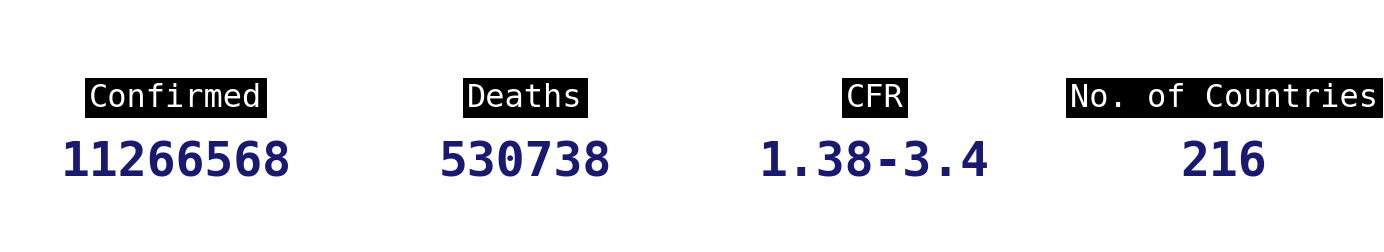

In [28]:
plot_card_grid('COVID-19', 'midnightblue')

In [29]:
c_lat['Country'] = c_lat['Country'].replace('South Korea', 'Korea')
c_lat['Country'] = c_lat['Country'].replace('US', 'United States')
c_lat['Country'] = c_lat['Country'].replace('Taiwan*', 'Taiwan')
c_lat['Country'] = c_lat['Country'].replace('Antigua and Barbuda', 'Antigua and Barb.')
c_lat['Country'] = c_lat['Country'].replace('Bosnia and Herzegovina', 'Bosnia and Herz.')
c_lat['Country'] = c_lat['Country'].replace('Burma', 'Myanmar')
c_lat['Country'] = c_lat['Country'].replace('Central African Republic', 'Central African Rep.')
c_lat['Country'] = c_lat['Country'].replace('Dominican Republic', 'Dominican Rep.')
c_lat['Country'] = c_lat['Country'].replace('Equatorial Guinea', 'Eq. Guinea')
c_lat['Country'] = c_lat['Country'].replace('Laos', 'Lao PDR')
c_lat['Country'] = c_lat['Country'].replace('Saint Kitts and Nevis', 'St. Kitts and Nevis')
c_lat['Country'] = c_lat['Country'].replace('Saint Vincent and the Grenadines', 'St. Vin. and Gren.')
c_lat['Country'] = c_lat['Country'].replace('Western Sahara', 'W. Sahara')
c_lat['Country'] = c_lat['Country'].replace('Cabo Verde', 'Cape Verde')
c_lat['Country'] = c_lat['Country'].replace('Congo (Kinshasa)', 'Dem. Rep. Congo')
c_lat['Country'] = c_lat['Country'].replace('Sao Tome and Principe', 'São Tomé and Principe')
c_lat['Country'] = c_lat['Country'].replace('Eswatini', 'Swaziland')
c_lat['Country'] = c_lat['Country'].replace("Cote d'Ivoire", "Côte d'Ivoire")
c_lat['Country'] = c_lat['Country'].replace('South Sudan', 'S. Sudan')
c_lat['Country'] = c_lat['Country'].replace('Czechia', 'Czech Rep.')
c_lat['Country'] = c_lat['Country'].replace('North Macedonia', 'Macedonia')
c_lat['Country'] = c_lat['Country'].replace('Congo (Brazzaville)', 'Congo')

In [30]:
a = set(world_map['name'].unique())
# a

b = set(c_lat['Country'])
# b

# b.difference(a)

In [31]:
# a.difference(b)

In [32]:
covid_map = world_map.merge(c_lat, left_on='name', right_on='Country')
covid_map = covid_map.sort_values('Cases', ascending=False)
# covid_map.head()

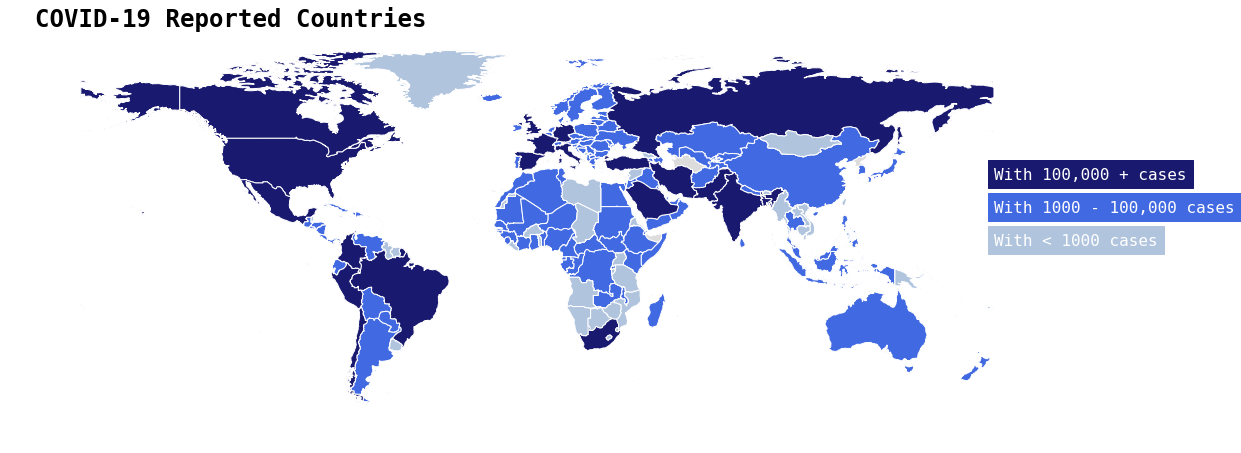

In [33]:
fig, ax = plt.subplots(figsize=(18, 8))

world_map.plot(ax=ax, color='gainsboro')

covid_map.plot(ax=ax, color='royalblue')
covid_map[covid_map['Cases'] > 100000].plot(ax=ax, color='midnightblue')
covid_map[covid_map['Cases'] < 1000].plot(ax=ax, color='lightsteelblue')

ax.text(180, 33, 'With 100,000 + cases', color='white', backgroundcolor='midnightblue',
        fontfamily='monospace', fontsize=16)
ax.text(180, 20, 'With 1000 - 100,000 cases', color='white', backgroundcolor='royalblue',
        fontfamily='monospace', fontsize=16)
ax.text(180, 7, 'With < 1000 cases', color='white', backgroundcolor='lightsteelblue',
        fontfamily='monospace', fontsize=16)

ax.set_title('COVID-19 Reported Countries', loc='left', fontdict={'fontsize':24, 
                                            'fontfamily':'monospace', 
                                            'fontweight': 'bold',
                                            'color':'black'})

ax.set_axis_off()

In [34]:
plot_treemap(c_lat_grp, 'Country', 'Cases')

## 2. MERS

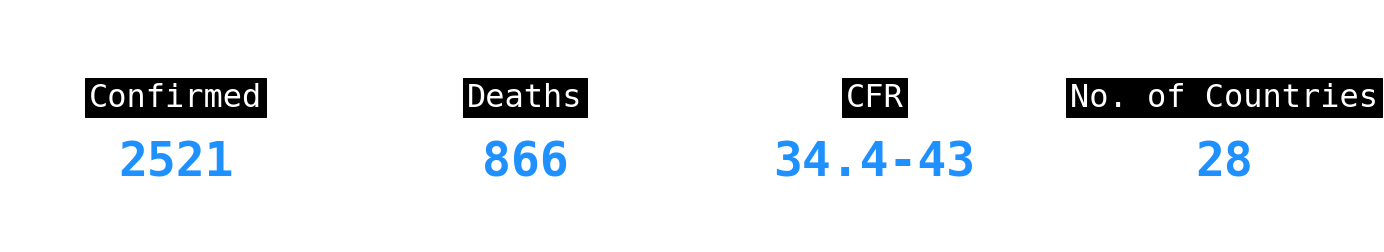

In [35]:
plot_card_grid('MERS', 'dodgerblue')

In [36]:
mers_cntry['Country'] = mers_cntry['Country'].replace('Republic of Korea', 'Korea')
mers_cntry['Country'] = mers_cntry['Country'].replace('United States of America', 'United States')

mers_map = world_map.merge(mers_cntry, left_on='name', right_on='Country')
# mers_map

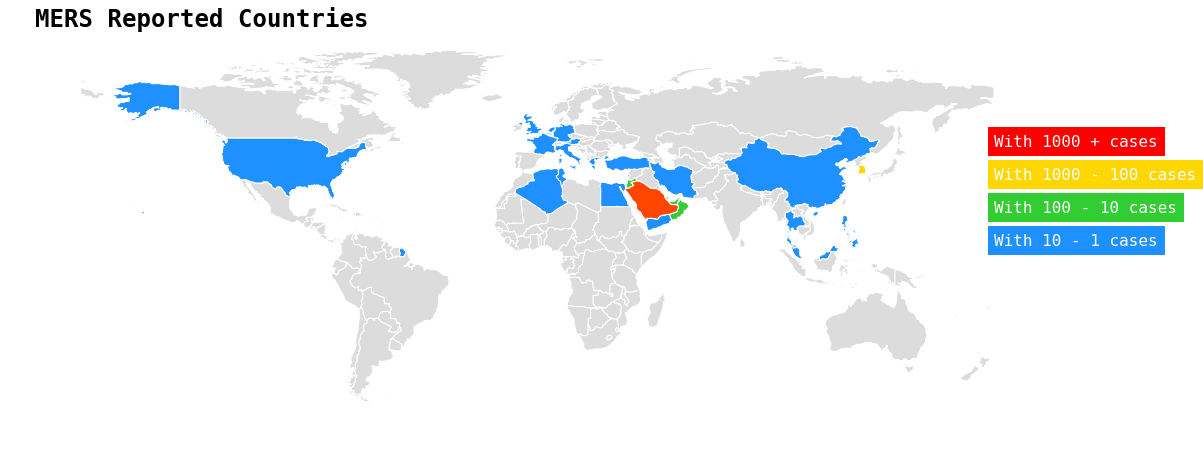

In [37]:


mers_countries = world_map[world_map['name'].isin(mers_cntry['Country'].unique())]
# sar_countries.head()

fig, ax = plt.subplots(figsize=(18, 8))

world_map.plot(ax=ax, color='gainsboro')
mers_map.plot(ax=ax, color='dodgerblue')
mers_map[mers_map['Confirmed'] > 10].plot(ax=ax, color='limegreen', markersize=10)
mers_map[mers_map['Confirmed'] > 100].plot(ax=ax, color='gold', markersize=10)
mers_map[mers_map['Confirmed'] > 1000].plot(ax=ax, color='orangered', markersize=10)


ax.text(180, 46, 'With 1000 + cases', color='white', backgroundcolor='red',
        fontfamily='monospace', fontsize=16)
ax.text(180, 33, 'With 1000 - 100 cases', color='white', backgroundcolor='gold',
        fontfamily='monospace', fontsize=16)
ax.text(180, 20, 'With 100 - 10 cases', color='white', backgroundcolor='limegreen',
        fontfamily='monospace', fontsize=16)
ax.text(180, 7, 'With 10 - 1 cases', color='white', backgroundcolor='dodgerblue',
        fontfamily='monospace', fontsize=16)


ax.set_title('MERS Reported Countries', loc='left', fontdict={'fontsize':24, 
                                            'fontfamily':'monospace', 
                                            'fontweight': 'bold',
                                            'color': 'black'})
ax.set_axis_off()

In [38]:
plot_treemap(mers_cntry, 'Country', 'Confirmed')

## 3. SARS

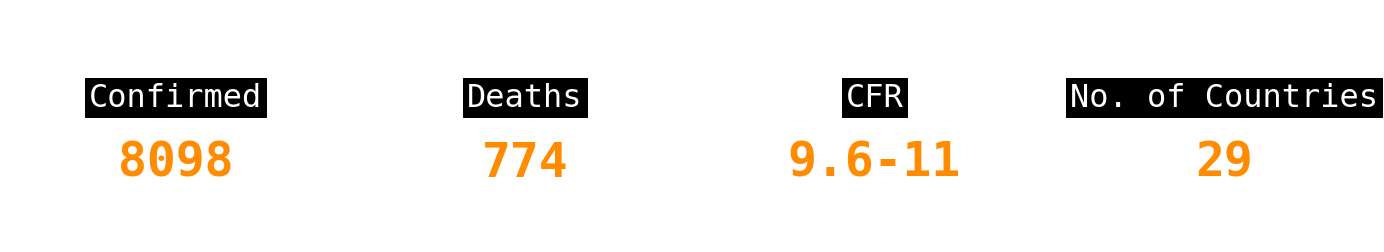

In [39]:
plot_card_grid('SARS', 'darkorange')

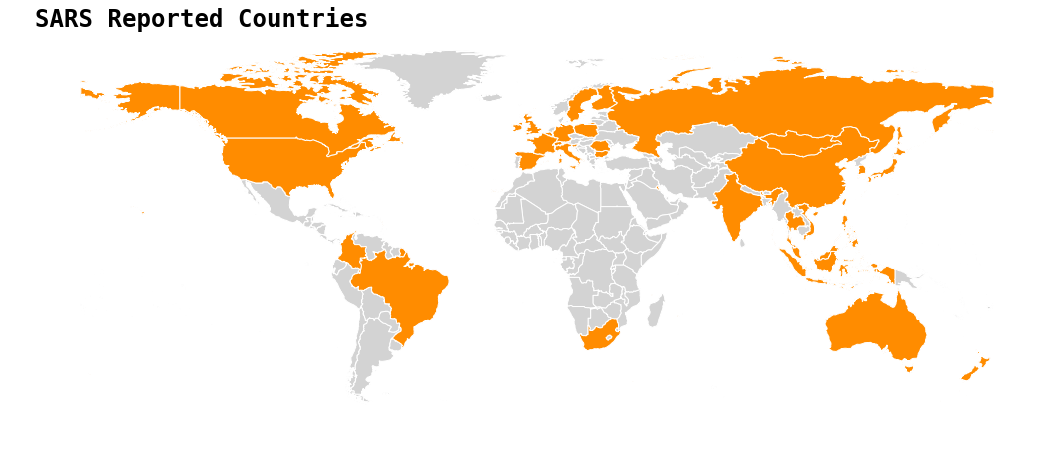

In [40]:
sars_03['Country'] = sars_03['Country'].replace('Hong Kong SAR, China', 'Hong Kong')
sars_03['Country'] = sars_03['Country'].replace('Macao SAR, China', 'Macao')
sars_03['Country'] = sars_03['Country'].replace('Republic of Ireland', 'Ireland')
sars_03['Country'] = sars_03['Country'].replace('Republic of Korea', 'Korea')
sars_03['Country'] = sars_03['Country'].replace('Russian Federation', 'Russia')
sars_03['Country'] = sars_03['Country'].replace('Taiwan, China', 'Taiwan')
sars_03['Country'] = sars_03['Country'].replace('Viet Nam', 'Vietnam')

sar_countries = world_map[world_map['name'].isin(sars_03['Country'].unique())]
# sar_countries.head()

fig, ax = plt.subplots(figsize=(18, 8))

world_map.plot(ax=ax, color='lightgrey')
sar_countries.plot(ax=ax, color='darkorange', markersize=10)

ax.set_title('SARS Reported Countries', loc='left', fontdict={'fontsize':24, 
                                            'fontfamily':'monospace', 
                                            'fontweight': 'bold',
                                            'color':'black'})
ax.set_axis_off()

In [41]:
plot_treemap(s_lat, 'Country', 'Cases')

## 4. Western Africa Ebola Outbreak

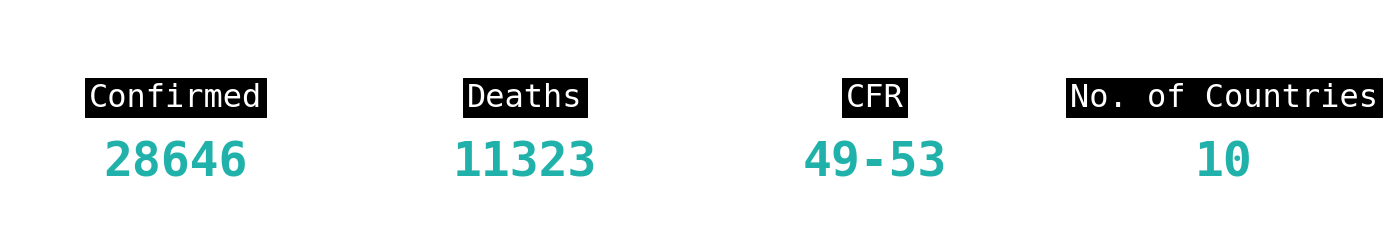

In [42]:
plot_card_grid('EBOLA', 'lightseagreen')

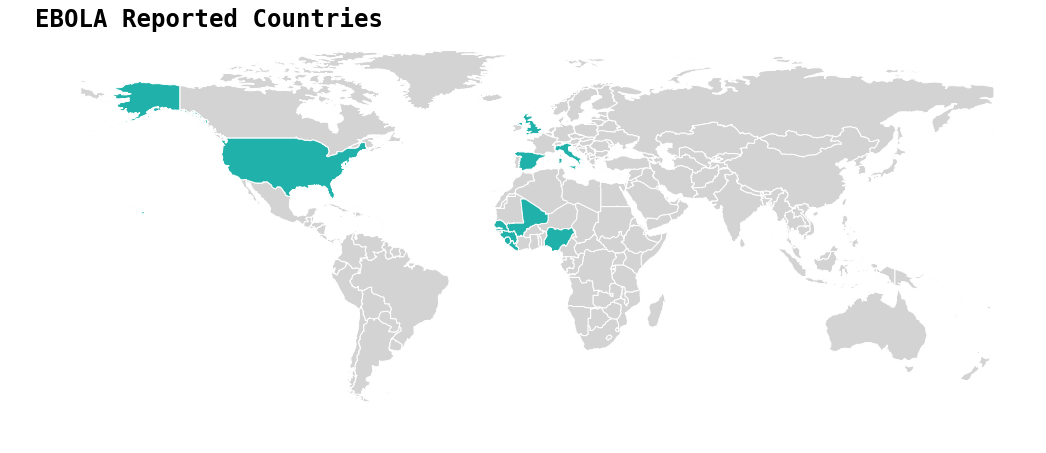

In [43]:
ebola_14['Country'] = ebola_14['Country'].replace('United States of America', 'United States')

ebola_countries = world_map[world_map['name'].isin(ebola_14['Country'].unique())]
# sar_countries.head()

fig, ax = plt.subplots(figsize=(18, 8))

world_map.plot(ax=ax, color='lightgrey')
ebola_countries.plot(ax=ax, color='lightseagreen', markersize=10)

ax.set_title('EBOLA Reported Countries', loc='left', fontdict={'fontsize':24, 
                                            'fontfamily':'monospace', 
                                            'fontweight': 'bold',
                                            'color':'black'})
ax.set_axis_off()

In [44]:
plot_treemap(e_lat, 'Country', 'Cases')

## 5. H1N1 | Swine Flu

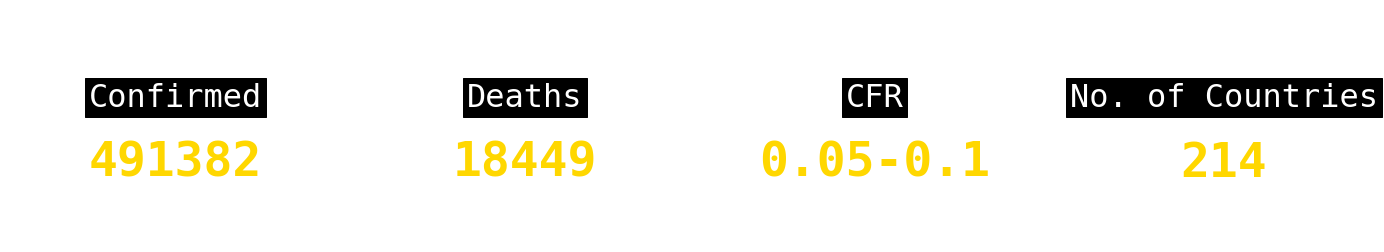

In [45]:
plot_card_grid('H1N1', 'gold')

## 6. Nipha

In [46]:
# Countries with reported outbreak
reported = ['Malaysia', 'Singapore', 'India', 'Bangladesh']

# Countries with reported outbreak or at risk based on serological evidence or molecular detection in Pteropus bats
at_risk = 'Australia, Bangladesh, Cambodia, China, India, Indonesia, Madagascar, Papua New Guinea, Taiwan, Thailand'
at_risk = at_risk.split(', ')

# Home range of Pteropus bats
bats_home = 'Bhutan, Brunei, China, India, Indonesia, Lao PDR, Madagascar, Myanmar, Nepal, Philippines, Papua New Guinea, Singapore, Taiwan, Thailand, Vietnam'
bats_home = bats_home.split(', ')

In [47]:
a = set(world_map['name'].unique())
# a

b = set(bats_home)
# b

# b.difference(a)

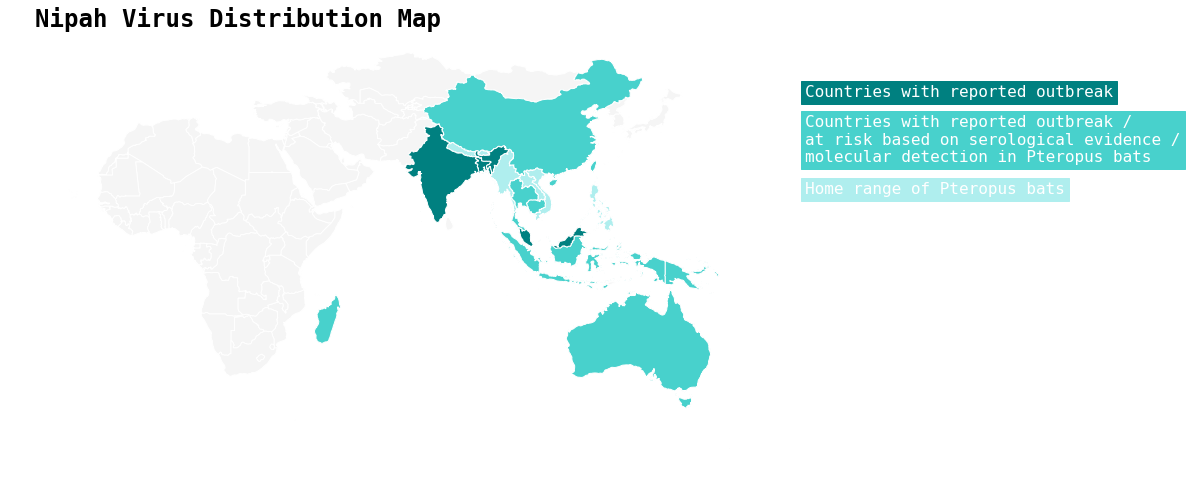

In [48]:
temp_map = world_map[world_map['continent'].isin(['Asia', 'Africa']) | world_map['name'].isin(['Australia', 'Papua New Guinea'])]

home = temp_map[temp_map['name'].isin(bats_home)]
risk = temp_map[temp_map['name'].isin(at_risk)]
case = temp_map[temp_map['name'].isin(reported)]

fig, ax = plt.subplots(figsize=(18, 8))
temp_map.plot(ax=ax, color='whitesmoke')

ax = home.plot(ax=ax, color='paleturquoise', markersize=10, legend=True)
ax = risk.plot(ax=ax, color='mediumturquoise', markersize=10, legend=True)
ax = case.plot(ax=ax, color='teal', markersize=10, legend=True)

ax.text(180, 43, 'Countries with reported outbreak', fontfamily='monospace',
        fontsize=16, color='white', backgroundcolor='teal')
ax.text(180, 25, 'Countries with reported outbreak /\nat risk based on serological evidence /\nmolecular detection in Pteropus bats', 
        fontfamily='monospace', fontsize=16, color='white', backgroundcolor='mediumturquoise')
ax.text(180, 16, 'Home range of Pteropus bats', fontfamily='monospace',
        fontsize=16, color='white', backgroundcolor='paleturquoise')

ax.set_title('Nipah Virus Distribution Map', loc='left', fontdict={'fontsize':24, 
                                            'fontfamily':'monospace', 
                                            'fontweight': 'bold',
                                            'color':'black'})
ax.set_axis_off()

## 7. Zika

In [49]:
# Areas with Zika outbreaks (red areas): 
red_zone = ""
red_zone = red_zone.split(', ')
    
# Areas with current or past transmission but no Zika outbreak (purple areas): 
purple_zone = "American Samoa, Angola, Anguilla, Antigua and Barbuda, Argentina, Aruba, Bahamas, Bangladesh, Barbados, Belize, Bolivia, Bonaire, Brazil, British Virgin Islands, Burkina Faso, Myanmar, Burundi, Cambodia, Cameroon, Cape Verde, Cayman Islands, Central African Rep., Colombia, Cook Islands, Costa Rica, Cuba, Curacao, Dominica, Dominican Republic, Easter Island, Ecuador, El Salvador, Ethiopia, Federated States of Micronesia, Fiji, France, French Guiana, French Polynesia, Gabon, Grenada, Guadeloupe, Guatemala, Guinea-Bissau, Guyana, Haiti, Honduras, India, Indonesia, Ivory Coast, Jamaica, Kiribati, Lao PDR, Malaysia, Maldives, Marshall Islands, Martinique, Mexico, Montserrat, New Caledonia, Nicaragua, Nigeria, Palau, Panama, Papua New Guinea, Paraguay, Peru, Philippines, Puerto Rico, Saba, Saint Barthelemy, Saint Kitts and Nevis, Saint Lucia, Saint Martin, Saint Vincent and the Grenadines, Samoa, Senegal, Singapore, Sint Eustatius, Sint Maarten, Solomon Islands, Suriname, Thailand, Tonga, Trinidad and Tobago, Turks and Caicos, Uganda, United States, United States Virgin Islands, Vanuatu, Venezuela, Vietnam"
purple_zone = purple_zone.split(', ')

# Areas with mosquitoes but no reported Zika cases (yellow areas): 
yellow_zone = "Australia, Benin, Bhutan, Botswana, Brunei, Chad, China, Christmas Island, Congo, Dem. Rep. Congo, Djibouti, East Timor, Egypt, Equatorial Guinea, Eritrea, Georgia, Ghana, Guam, Guinea, Kenya, Liberia, Madagascar, Madeira Islands, Malawi, Mali, Mozambique, Namibia, Nauru, Nepal, Niger, Niue, Northern Mariana Islands, Oman, Pakistan, Russia, Rwanda, Saudi Arabia, Sierra Leone, Somalia, South Africa, S. Sudan, Sri Lanka, Sudan, Taiwan, Tanzania, The Gambia, Togo, Tokelau, Turkey, Tuvalu, Uruguay, Wallis and Futuna, Yemen, Zambia, Zimbabwe"
yellow_zone = yellow_zone.split(', ')

# Areas with no mosquitoes that spread Zika (green areas): 
green_zone = "Afghanistan, Albania, Algeria, Andorra, Armenia, Austria, Azerbaijan, Azores, Bahrain, Belarus, Belgium, Bermuda, Bosnia and Herzegovina, British Indian Ocean Territory, Bulgaria, Canada, Canary Islands, Chile, Cocos Islands, Comoros, Corsica, Croatia, Crozet Islands, Cyprus, Czech Republic, Denmark, Estonia, Eswatini, Falkland Islands, Faroe Islands, Finland, Germany, Gibraltar, Greece, Greenland, Guernsey, Hong Kong, Hungary, Iceland, Iran, Iraq, Ireland, Isle of Man, Israel, Italy, Japan, Jersey, Jordan, Kazakhstan, Kerguelen Islands, Kosovo, Kuwait, Kyrgyzstan, Latvia, Lebanon, Lesotho, Libya, Liechtenstein, Lithuania, Luxembourg, Macau, Malta, Mauritania, Mauritius, Mayotte, Moldova, Monaco, Mongolia, Montenegro, Morocco, Netherlands, New Zealand, Norfolk Island, Dem. Rep. Korea, North Macedonia, Norway, Pitcairn Islands, Poland, Portugal, Qatar, Reunion, Romania, Saint Helena, Saint Paul and New Amsterdam Islands, Saint Pierre and Miquelon, San Marino, São Tomé and Principe, Serbia, Seychelles, Slovakia, Slovenia, South Georgia and the South Sandwich Islands, Korea, Spain, Sweden, Switzerland, Syria, Tajikistan, Tunisia, Turkmenistan, Ukraine, United Arab Emirates, United Kingdom, Uzbekistan, Vatican City, Wake Island, Western Sahara"
green_zone = green_zone.split(', ')

In [50]:
a = set(world_map['name'].unique())
# a

b = set(green_zone)
# b

# b.difference(a)

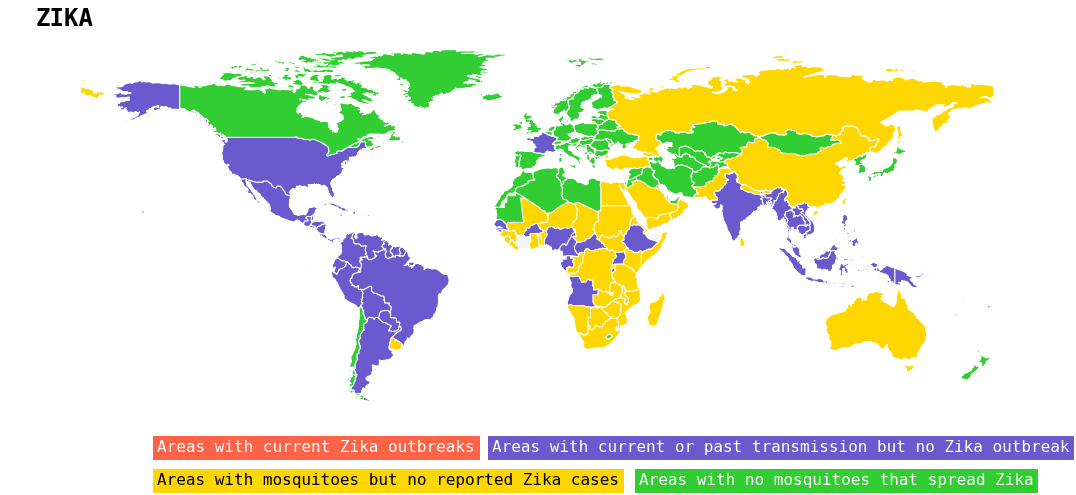

In [51]:
# r = world_map[world_map['name'].isin(red_zone)]
p = world_map[world_map['name'].isin(purple_zone)]
y = world_map[world_map['name'].isin(yellow_zone)]
g = world_map[world_map['name'].isin(green_zone)]

fig, ax = plt.subplots(figsize=(18, 10))
world_map.plot(ax=ax, color='whitesmoke')

# r.plot(ax=ax, color='tomato', markersize=10, label='With current Outbreak', legend=True)
p.plot(ax=ax, color='slateblue', legend=True)
y.plot(ax=ax, color='gold', legend=True)
g.plot(ax=ax, color='limegreen', legend=True)

ax.text(-150, -75, 'Areas with current Zika outbreaks', 
        fontfamily='monospace', fontsize=16, color='white', backgroundcolor='tomato')
ax.text(-18, -75, 'Areas with current or past transmission but no Zika outbreak', 
        fontfamily='monospace', fontsize=16, color='white', backgroundcolor='slateblue')
ax.text(-150, -88, 'Areas with mosquitoes but no reported Zika cases', 
        fontfamily='monospace', fontsize=16, color='black', backgroundcolor='gold')
ax.text(40, -88, 'Areas with no mosquitoes that spread Zika', 
        fontfamily='monospace', fontsize=16, color='white', backgroundcolor='limegreen')

ax.set_title('ZIKA', loc='left', fontdict={'fontsize': 24, 
                                            'fontfamily': 'monospace', 
                                            'fontweight': 'bold',
                                            'color': 'black'})
ax.set_axis_off()

Source - https://wwwnc.cdc.gov/travel/page/zika-information

> * Purple Area - Areas with current or past transmission but no Zika outbreak
> * Yellow Area - Areas with mosquitoes but no reported Zika cases
> * Green Area - Areas with no mosquitoes that spread Zika

# Comparison

## World Map

In [52]:
px.scatter_geo(df, lat='Latitude', lon='Longitude', color='Epidemic', 
               hover_data=['First Reported Year', 'First Reported Place'], 
               size=[1 for i in range(len(df))], 
               title='From which place did the epidemic outbroke?',
               color_discrete_sequence = px.colors.qualitative.Dark2)

## Timeline

In [53]:
fig = px.scatter(df, y='First Reported Date', 
                 size=df['Confirmed']**0.3, color='Epidemic', 
                 hover_name='Epidemic', text='Epidemic', title='First Reported Year', 
                 width=350, height=700, range_x=[-0.1, 0.2],
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.update_traces(textposition='middle right')
fig.update_xaxes(showticklabels=False)
fig.update_layout(showlegend=False, xaxis_title="", yaxis_title="")
fig.show()

## Top countries

In [54]:
# plotly hbar graphs from 'df' dataframe
def plot_hbar(col, title, n=5):
    fig = px.bar(df.sort_values(col,ascending=False)[:n], 
                 x=col, y="Epidemic", color='Epidemic', text=col, 
                 height=400, width=700, orientation='h',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_traces(textposition='auto')
    fig.update_layout(title=title,
                      xaxis_title="",
                      yaxis_title="",
                      uniformtext_minsize=8, 
                      uniformtext_mode='hide', 
                      showlegend=False)
    fig.show()

In [55]:
plot_hbar('Confirmed', "No. of Confirmed Cases")

In [56]:
plot_hbar('Deaths', "No. of Deaths Reported")

In [57]:
plot_hbar('No. of Countries', "No. of Countries to which the epidemic spread", 7)

In [58]:
n_days = df['1000th Case On'] - df['First Reported Date']
df['n_days_to_1000_cases'] = n_days.dt.days

temp = df[['Epidemic', 'n_days_to_1000_cases']] \
            .sort_values('n_days_to_1000_cases', ascending=True) \
            .dropna()

fig = px.bar(temp, x='n_days_to_1000_cases', y='Epidemic', color='Epidemic', 
             text='n_days_to_1000_cases', height=400, width=700, orientation='h',
             color_discrete_sequence = px.colors.qualitative.Set2)
fig.update_traces(textposition='auto')
fig.update_layout(title='No. of days to 1000 cases',
                  xaxis_title="",
                  yaxis_title="",
                  uniformtext_minsize=8, 
                  uniformtext_mode='hide', 
                  showlegend=False)
fig.show()

## In the first 100 Days

In [59]:
def plot_first_n_days(col, n_days, title):
    
    temp = combined[combined['nth_day']<=n_days]
    
    fig = px.line(temp, x="nth_day", y=col, color='epidemic', 
                  range_x=[0, n_days], height=550, width=700,
                  title=title+' '+str(n_days)+' days')
    fig.update_layout(xaxis_rangeslider_visible=True)
    fig.update_layout(xaxis_title="",yaxis_title="")
    fig.show()

In [60]:
plot_first_n_days('Cases', 100, 'No. of Cases in the first')

In [61]:
plot_first_n_days('Deaths', 100, 'No. of Deaths in the first')

In [62]:
plot_first_n_days('n_countries', 100, 'No. of countries in the first')

## CFR

> CFR (Case fatality rate), also called case fatality risk or case fatality ratio, in epidemiology, the proportion of people who die from a specified disease among all individuals diagnosed with the disease over a certain period of time. - *[Britannica](https://www.britannica.com/science/case-fatality-rate)*

In [63]:
list_of_epidemic = df['Epidemic']
list_of_cfr = df['CFR']
mid = [float(i.split('-')[0]) for i in df['CFR']]
end = [float(i.split('-')[1]) for i in df['CFR']]

In [64]:
def plot_cfr(epidemic, mid, end, ax=ax):
    
    inc_day = []
    for i in range(1, 101):
        if(i<mid):
            inc_day.append(2)
        elif(i<end):
            inc_day.append(1)
        else:
            inc_day.append(0)
    inc_day = np.array(inc_day)
    inc_day = inc_day.reshape(10, 10)

    ax=sns.heatmap(inc_day, linewidths=2, square=True, 
                   xticklabels='', yticklabels='', ax=ax,
                   cbar=False, cmap=['whitesmoke', 'coral','tomato'])
    ax.set_title(epidemic, fontdict={'fontsize':16})
    return ax

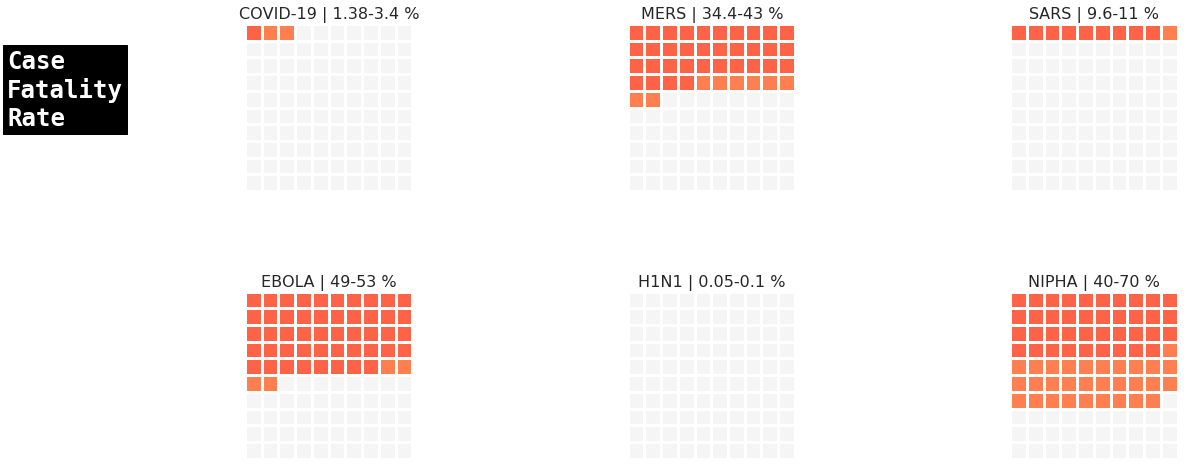

In [65]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
plt.subplots_adjust(hspace=0.6, wspace=0.6)
axes = axes.flatten()

plt.text(-60, -10, 'Case\nFatality\nRate', fontsize=24, 
         fontfamily='monospace', fontweight='bold',
         color='white', backgroundcolor='black')

for ind in range(6):
    plot_cfr(list_of_epidemic[ind] + ' | ' + list_of_cfr[ind] + ' %', 
             mid[ind], end[ind], ax=axes[ind])
    
plt.show()

## Incubation Period

> The incubation period is the number of days between when you’re infected with something and when you might see symptoms. - *[WebMD](https://www.webmd.com/lung/coronavirus-incubation-period)*

In [66]:
list_of_epidemic = df['Epidemic'][:7]
start = [int(i.split('-')[0]) for i in df['Incubation Period'][:7]]
end = [int(i.split('-')[1]) for i in df['Incubation Period'][:7]]
height = [a-b for a, b in zip(end, start)]

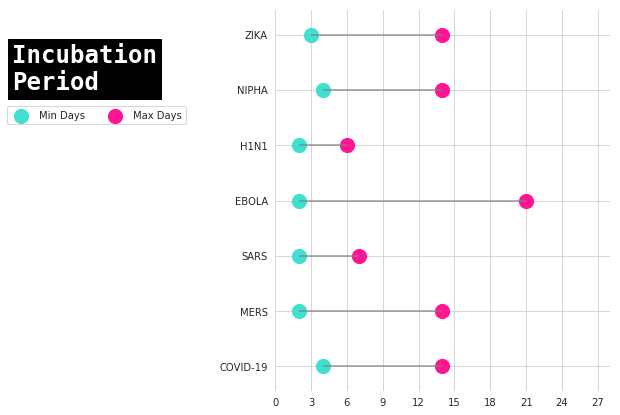

In [67]:
sns.set_style('whitegrid')
plt.figure(figsize=(6, 7))

plt.hlines(y=list_of_epidemic, xmin=start, xmax=end, color='gray', alpha=0.8)
plt.scatter(start, list_of_epidemic, color='turquoise', alpha=1, s=200, label='Min Days')
plt.scatter(end, list_of_epidemic, color='deeppink', alpha=1 , s=200, label='Max Days')
 
plt.text(-22, 5, 'Incubation\nPeriod', fontsize=24, 
         fontfamily='monospace', fontweight='bold',
         color='white', backgroundcolor='black')

sns.despine(left=True, bottom=True)

plt.xlim(0, 28)
plt.xticks([i for i in range(0,29,3)])
plt.legend(loc=(-0.8,0.7), ncol=2)
plt.show()

## R0 Score

> R0 tells you the average number of people who will contract a contagious disease from one person with that disease. It specifically applies to a population of people who were previously free of infection and haven’t been vaccinated.  For example, if a disease has an R0 of 18, a person who has the disease will transmit it to an average of 18 other people. - *[Healthline](https://www.healthline.com/health/r-nought-reproduction-number)*

In [68]:
list_of_epidemic = df['Epidemic'][:7]
min_r0 = [float(i.split('-')[0]) for i in df['Ro'][:7]]
max_r0 = [float(i.split('-')[1]) for i in df['Ro'][:7]]
height = [a-b for a, b in zip(max_r0, min_r0)]

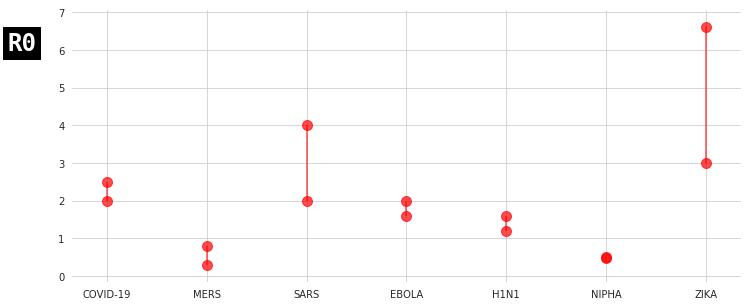

In [69]:
sns.set_style('whitegrid')
# plt.style.use('seaborn')
plt.figure(figsize=(12, 5))

plt.vlines(x=list_of_epidemic, ymin=min_r0, ymax=max_r0, color='red', alpha=0.7)
plt.scatter(list_of_epidemic, min_r0, color='red', alpha=0.7, s=100, label='Min Days')
plt.scatter(list_of_epidemic, max_r0, color='red', alpha=0.7, s=100, label='Max Days')

plt.text(-1, 6, 'R0', fontsize=24, 
         fontfamily='monospace', fontweight='bold',
         color='white', backgroundcolor='black')

sns.despine(left=True, bottom=True)
plt.show()

# Related Works

### COVID-19   
> [htt://www.kaggle.com/imdevskp/covid-19-analysis-viz-prediction-comparisons](https://www.kaggle.com/imdevskp/covid-19-analysis-viz-prediction-comparisons)  
### EBOLA   
> [https://www.kaggle.com/imdevskp/western-africa-ebola-outbreak-analysis](https://www.kaggle.com/imdevskp/western-africa-ebola-outbreak-analysis)  
### SARS   
> [https://www.kaggle.com/imdevskp/sars-2003-outbreak-analysis](https://www.kaggle.com/imdevskp/sars-2003-outbreak-analysis)
### MERS   
> [https://www.kaggle.com/imdevskp/mers-outbreak-analysis](https://www.kaggle.com/imdevskp/mers-outbreak-analysis)